# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \ln (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

The first and second derivatives are:

$f'(x) = \text{arctg}x + x \frac1{1 + x^2} - \frac12 \frac1{1 + x^2} 2x = \text{arctg}x$

$f''(x) = \frac1{1 + x^2}$

Now let's identify the constants $L$ and $M$ from the Theorem about the sufficient convergence condition from the seminar

$\| \nabla^2 f(x) - \nabla^2 f(y) \| = \|\frac{(x - y)(x + y)}{(1 + x^2)(1 + y^2)}\| = |\frac{(x - y)(x + y)}{(1 + x^2)(1 + y^2)}|  \leq M \|x - y\| = M |x - y|$, which means

$\|\frac{(x - y)(x + y)}{(1 + x^2)(1 + y^2)}\| = \frac{|x + y|}{|(1 + x^2)(1 + y^2)|}  \leq \frac{|x| + |y|}{|1 + x^2||1 + y^2|} \leq M $

$|x| + |y| \leq M|1 + x^2||1 + y^2|$

$\frac1M |x| + \frac1M |y| \leq |1 + x^2||1 + y^2| = 1 + x^2 + y^2 + x^2y^2$

$0 \leq - \frac1M |x| - \frac1M |y| + 1 + x^2 + y^2 + x^2y^2$

$0 \leq (\frac1{2M} - |x|)^2 + (\frac1{2M} - |y|)^2 + 1 - \frac1{2M^2}+ x^2y^2$

And we see that inequality is definitely right for the least $M = \frac1{\sqrt2}$

$\nabla^2 f(x^*) \succeq lI, l > 0$, here $\frac1{1 + x^{*^2}} \geq l$

With the criteria of minimum of the convex function we have $\text{arctg}x^* = 0 \Rightarrow x^* = 0 \Rightarrow l = 1$

Since $f'(x) = \arctan(x)$, we need to find the maximum value of $|\arctan(x)|$ over the entire domain of $x$, which occurs at $x = ±∞$, and it is equal to $\pi/2$. Therefore, the Lipschitz constant $L = \pi/2$

In [305]:
import my_optimization as opt
import numpy as np
from importlib import reload as r

In [306]:
args = {}
acc = None
args['L'] = 3.14 / 2

def f(x, args):
    return x * np.arctan(x) - 1/2 * np.log(1 + x**2)

def grad_f(x, args):
    return np.arctan(x)

def hessian_f(x, args):
    return np.array([1 / (1 + x**2)])

 11%|█         | 11/100 [00:00<00:00, 11019.19it/s]


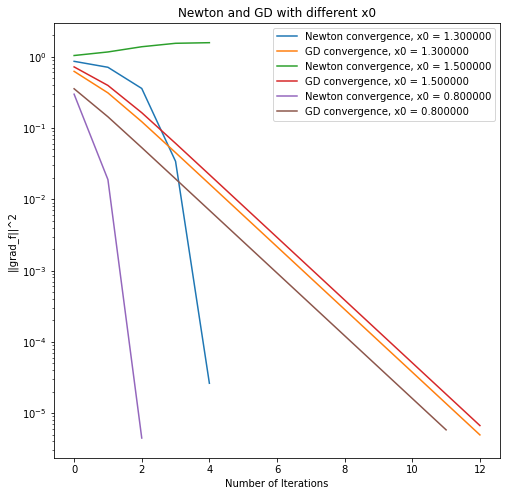

In [307]:
n_iter_newton = 5
n_iter_gd = 100
x, y, label = [], [], []

def gamma_newton(k, f, grad_f, x_k, x_true, hess_inv, args):
    return 1

def gamma(k, f, grad_f, x_k, x_true, args):
    return 1 / args['L']

for x_0 in [np.array([1.3]), np.array([1.5]), np.array([0.8])]:
    newton = opt.NewtonOptimizer(
                                f, grad_f, gamma_k = gamma_newton, criterium = '||grad_f(x_k)||', 
                                x_0 = x_0, n_iter = n_iter_newton, args = args, acc_k = acc,
                                newton_activate = True, hessian_f = hessian_f
                                )

    points_arr, differences_arr, times_arr, acc_arr = newton.descent()
    iter_arr = [i for i in range(len(differences_arr))]

    x.append(iter_arr)
    y.append(differences_arr)
    label.append(r'Newton convergence, x0 = %f' % x_0)

    gd = opt.NewtonOptimizer(
                            f, grad_f, gamma_k = gamma, criterium = '||grad_f(x_k)||', 
                            x_0 = x_0, n_iter = n_iter_gd, args = args, acc_k = acc
                            )

    points_arr, differences_arr, times_arr, acc_arr = gd.descent()
    iter_arr = [i for i in range(len(differences_arr))]

    x.append(iter_arr)
    y.append(differences_arr)
    label.append(r'GD convergence, x0 = %f' % x_0)

opt.plot_graphs(x, y, "Number of Iterations", label, "Newton and GD with different x0", 
                logscale = True, criteria_type = "||grad_f||^2")

From the theorem the 3rd sufficient condition was: $\|x^0 - x^*\| \nleq \frac{2l}{3M} = \frac{2\sqrt{2}}{3}$, and we see that for $x_0 = 1.3$ we have $1.3 \leq \frac{2\sqrt{2}}{3}$, and for $x_0 = 1.5$ we have $1.5 \nleq \frac{2\sqrt{2}}{3}$

But we see the convergence of method for  $x_0 = 1.3$, and divergence for  $x_0 = 1.5$, because the condition is basically sufficient, also we know that the convergence is local, and to fix it we have some updates in the next task

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

100%|██████████| 5/5 [00:00<00:00, 5015.91it/s]


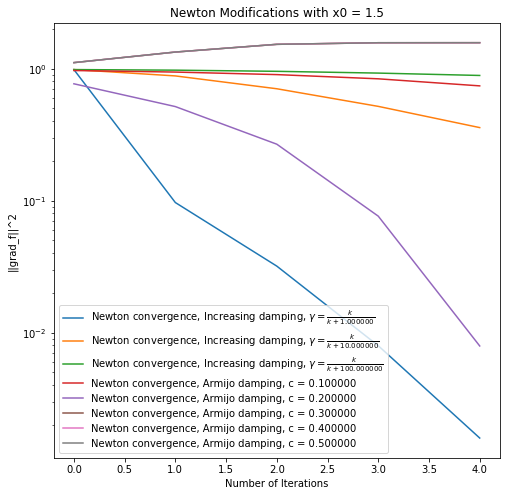

In [308]:
#Damped Newton Method
r(opt)
n_iter_newton = 5
times_list, x, y, label = [], [], [], []
x_0 = np.array([1.5])

#Increasing Damping
def gamma_inc(k, f, grad_f, x_k, x_true, hess_inv, args):
    return k / (args['denom_add'] + k)

for args['denom_add'] in [1, 10, 100]:
    damped_newton = opt.NewtonOptimizer(
                                f, grad_f, gamma_k = gamma_inc, criterium = '||grad_f(x_k)||', 
                                x_0 = x_0, n_iter = n_iter_newton, args = args, acc_k = acc,
                                newton_activate = True, hessian_f = hessian_f
                                )

    points_arr, differences_arr, times_arr, acc_arr = damped_newton.descent()
    iter_arr = [i for i in range(len(differences_arr))]

    times_list.append(times_arr)
    x.append(iter_arr)
    y.append(differences_arr)
    label.append(r'Newton convergence, Increasing damping, $\gamma = \frac{k}{k + %f}$' % args['denom_add'])

#Armijo Damping: parameters backtracking_coef and gamma_k^0 were somehow optimized before to ensure the convergence
args['backtracking_coef'] = 1.6
args['gamma_k'] = 0.01

def gamma_armijo(k, f, grad_f, x_k, x_true, hess_inv, args):
    if f(x_k - args['gamma_k'] * hess_inv @ grad_f(x_k, args), args) - f(x_k, args) <= - \
        args['c'] * args['gamma_k'] * grad_f(x_k, args) @ (hess_inv @ grad_f(x_k, args)):
        args['gamma_k'] *= args['backtracking_coef']
    return args['gamma_k']

for args['c'] in [0.1, 0.2, 0.3, 0.4, 0.5]:
    damped_newton = opt.NewtonOptimizer(
                                f, grad_f, gamma_k = gamma_armijo, criterium = '||grad_f(x_k)||', 
                                x_0 = x_0, n_iter = n_iter_newton, args = args, acc_k = acc,
                                newton_activate = True, hessian_f = hessian_f
                                )

    points_arr, differences_arr, times_arr, acc_arr = damped_newton.descent()
    iter_arr = [i for i in range(len(differences_arr))]
    
    times_list.append(times_arr)
    x.append(iter_arr)
    y.append(differences_arr)
    label.append(r'Newton convergence, Armijo damping, c = %f' % args['c'])

opt.plot_graphs(x, y, "Number of Iterations", label, "Newton Modifications with x0 = 1.5", 
                logscale = True, criteria_type = "||grad_f||^2")

 60%|██████    | 3/5 [00:00<00:00, 334.14it/s]


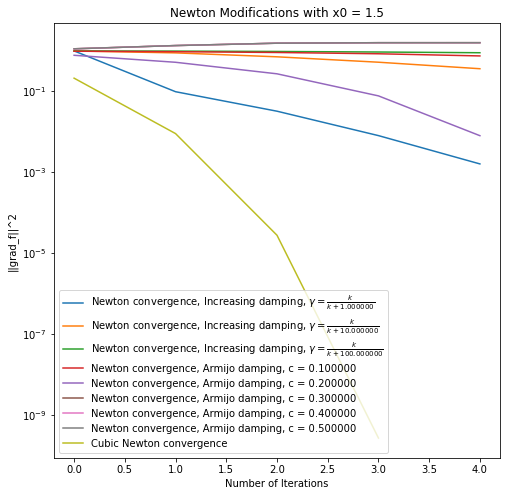

In [309]:
#Cubic Newton Method
r(opt)
n_iter_newton = 5
x_0 = np.array([1.5])
args['M'] = 1 / np.sqrt(2)

cubic_newton = opt.NewtonOptimizer(
                            f, grad_f, gamma_k = gamma_inc, criterium = '||grad_f(x_k)||', 
                            x_0 = x_0, n_iter = n_iter_newton, args = args, acc_k = acc,
                            cubic_newton_activate = True, hessian_f = hessian_f
                            )

points_arr, differences_arr, times_arr, acc_arr = cubic_newton.descent()
iter_arr = [i for i in range(len(differences_arr))]

times_list.append(times_arr)
x.append(iter_arr)
y.append(differences_arr)
label.append(r'Cubic Newton convergence')

opt.plot_graphs(x, y, "Number of Iterations", label, "Newton Modifications with x0 = 1.5", 
                logscale = True, criteria_type = "||grad_f||^2")

So we see that the modifications of the Newton method help to converge even from the initial point `x_0 = 1.5`

Here we see that Cubic method is really powerful because of using $\argmin$ function inside the whole decomposition. Of course because of this it requires more time and there can be problems for high-dimension problems

Damping also may be more powerful, but it requires thorough hyperparameters choosing. Even with my selection we see the convergence, comparing to the original Newton's method, which diverged here

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

Firstly let's derive the hessian of logistic regression:
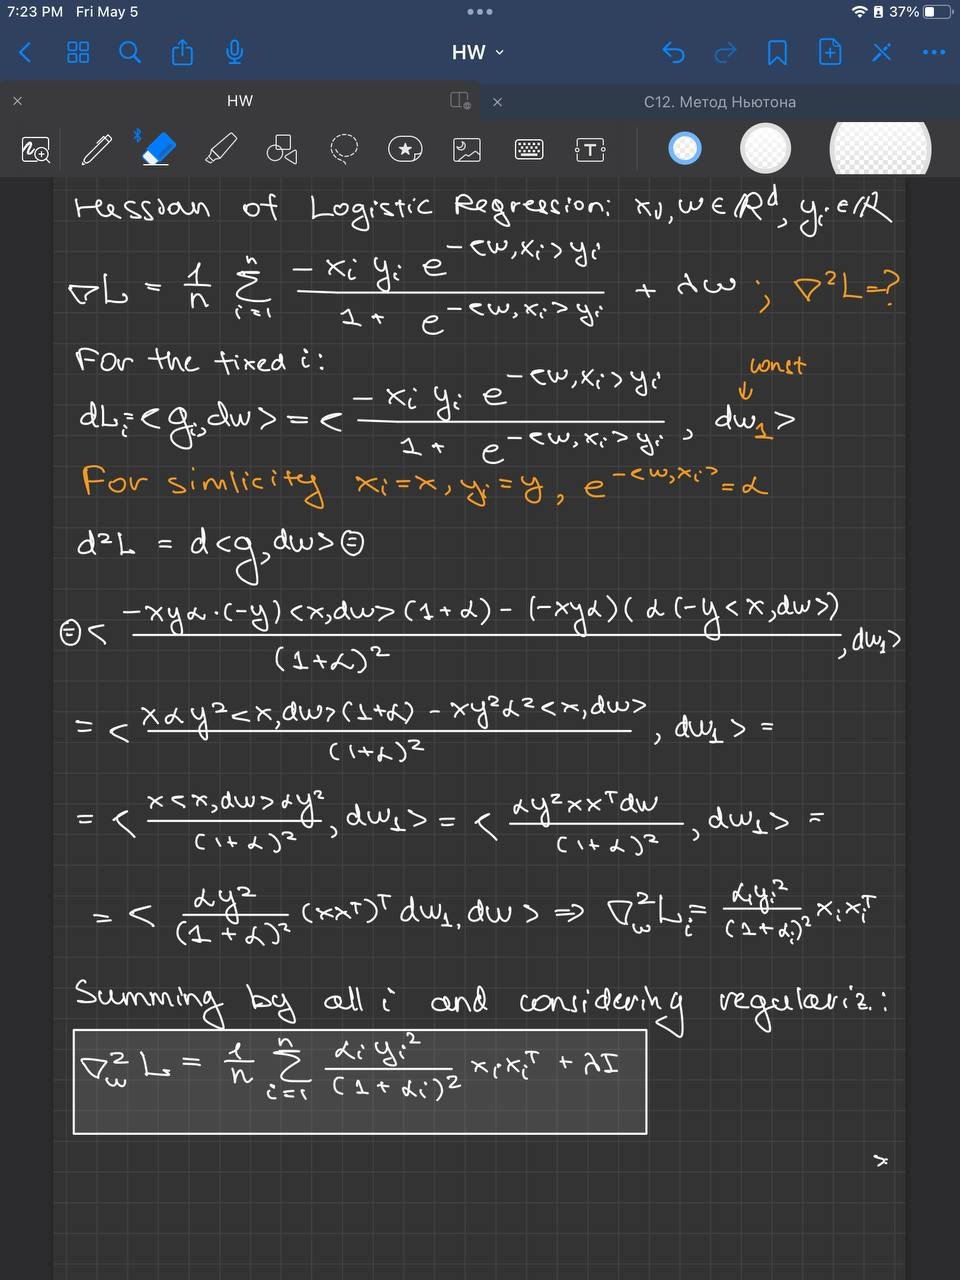

In [310]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [324]:
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
y = 2*y - 3
args = {}
args['n'], args['d'] = X.shape

args['X_train'], args['X_test'], args['y_train'], args['y_test'] = train_test_split(X, y, test_size=0.25, random_state=True)

args['L'] = np.linalg.norm(1/(4*args['n']) * args['X_train'].T @ args['X_train'])
args['lambda'] = args['L'] / 100

def logloss(w, args):
    ans = 0
    for i in range(len(args['X_train'])):
        ans += np.log(1 + np.exp(-(w @ args["X_train"][i]) * args["y_train"][i]))
    return ans / len(args['X_train']) + 1/2 * args['lambda'] * np.linalg.norm(w, ord = 2)**2

def logloss_grad(w, args):
    grad = np.zeros(w.size)
    n_samples = args['X_train'].shape[0]
    for i in range(n_samples):
        alpha_i = np.exp(- w.dot(args['X_train'][i]) * args['y_train'][i])
        grad += -args['X_train'][i] * args['y_train'][i] * alpha_i / (1 + alpha_i)
    return grad / n_samples + args['lambda'] * w

def logloss_hess(w, args):
    hessian = np.zeros((w.size, w.size))
    n_samples = args['X_train'].shape[0]
    for i in range(n_samples):
        alpha_i = np.exp(- w.dot(args['X_train'][i]) * args['y_train'][i])
        hessian += (alpha_i * (args['y_train'][i])**2) / (1 + alpha_i)**2 * \
            (args['X_train'][i].reshape(-1,1)) @ (args['X_train'][i].reshape(1,-1))

    return hessian / n_samples + args['lambda'] * np.eye(w.size)

def log_acc(k, f, grad_f, x_k, x_true, args):
    corr_count = 0
    test_count = len(args['y_test'])
    for i in range(test_count):
        if args['X_test'][i].dot(x_k) * args['y_test'][i] > 0:
            corr_count += 1
    return corr_count / test_count

def gamma_const(k, f, grad_f, x_k, x_true, args):
        return 1

def l2_prox(x, k, args):
    gamma = gamma_const(None, None, None, None, None, args)
    alpha = np.max(1 - gamma * args['lambda'] / np.linalg.norm(x, ord=2), 0)

    return alpha * x

The idea from the seminar is to firstly use the basic gradient descent until some value of criteria and afterwards "kill" it with Newton method in few steps. We know that if $\|x^0 - x^*\| \leq \frac{2l}{3M}$ and other conditions are satisfied, Newton method converges, so I'll just try to estimate this constant.

 20%|██        | 1/5 [00:01<00:05,  1.39s/it]


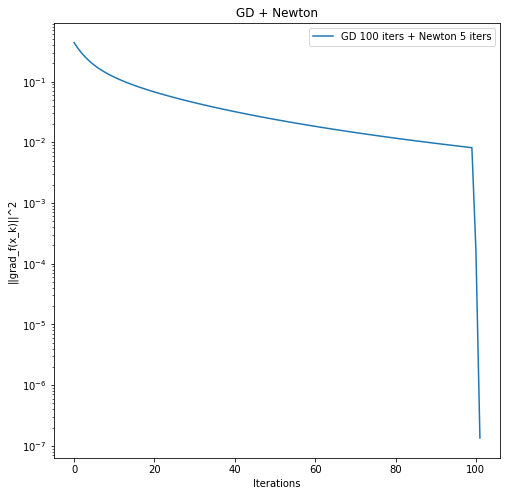

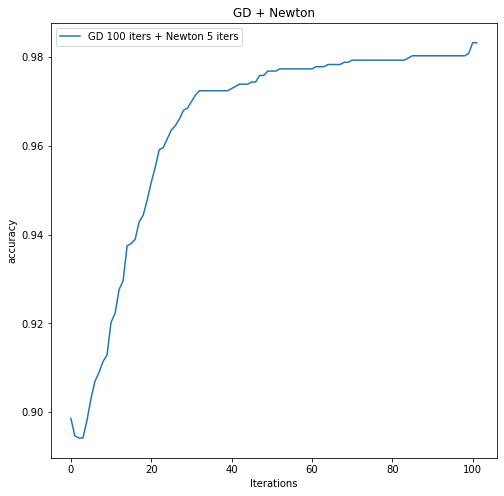

In [312]:
n_iter_gd = 100
n_iter_newton = 5
x_0 = np.zeros(args['d'])
iter_list, points_list, differences_list, times_list, acc_list, labels_list = [], [], [], [], [], []

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return 1/args['L']

gd = opt.NewtonOptimizer(
                        logloss, logloss_grad, gamma_k = gamma_gd, criterium = '||grad_f(x_k)||', 
                        x_0 = x_0, n_iter = n_iter_gd, args = args, acc_k = log_acc
                        )

points_arr_1, differences_arr_1, times_arr_1, acc_arr_1 = gd.descent() 

def gamma_newton(k, f, grad_f, x_k, x_true, hess_inv, args):
    return 1

newton = opt.NewtonOptimizer(
                            logloss, logloss_grad, gamma_k = gamma_newton, criterium = '||grad_f(x_k)||', 
                            x_0 = points_arr_1[-1], n_iter = n_iter_newton, args = args, acc_k = log_acc,
                            newton_activate = True, hessian_f = logloss_hess
                            )

points_arr_2, differences_arr_2, times_arr_2, acc_arr_2 = newton.descent()

points_list.append(np.concatenate((points_arr_1, points_arr_2), axis=0))
iter_list.append([i for i in range(len(points_arr_1) + len(points_arr_2))])
differences_list.append(np.concatenate((differences_arr_1, differences_arr_2)))
times_list.append(np.concatenate((times_arr_1, times_arr_2)))
acc_list.append(np.concatenate((acc_arr_1, acc_arr_2)))
labels_list.append(r'GD %i iters + Newton %i iters' % (n_iter_gd, n_iter_newton))

opt.plot_graphs(iter_list, differences_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD + Newton', 
                logscale = True, criteria_type = "||grad_f(x_k)||^2")
opt.plot_graphs(iter_list, acc_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD + Newton', 
                logscale = False, criteria_type = "accuracy")

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

100%|██████████| 5/5 [00:01<00:00,  4.74it/s]


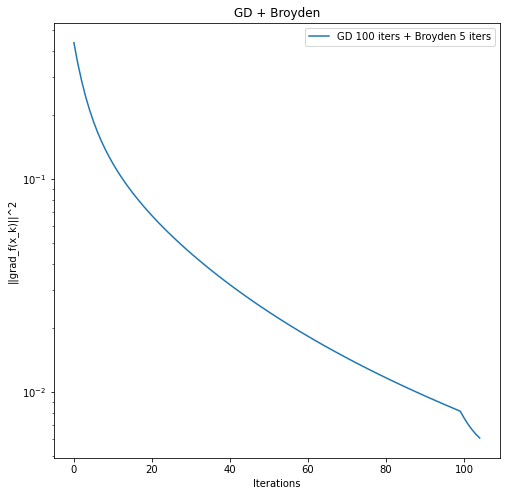

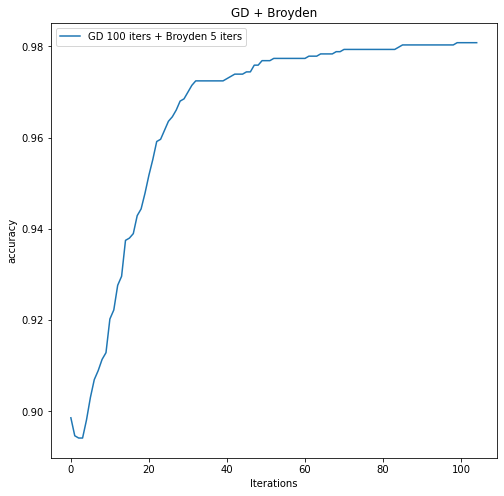

In [329]:
#Broyden
r(opt)
n_iter_gd = 100
n_iter_newton = 5
x_0 = np.zeros(args['d'])
iter_list, points_list, differences_list, times_list, acc_list, labels_list = [], [], [], [], [], []

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return 1/args['L']

gd = opt.NewtonOptimizer(
                        logloss, logloss_grad, gamma_k = gamma_gd, criterium = '||grad_f(x_k)||', 
                        x_0 = x_0, n_iter = n_iter_gd, args = args, acc_k = log_acc
                        )

points_arr_1, differences_arr_1, times_arr_1, acc_arr_1 = gd.descent() 

def gamma_broyden(k, f, grad_f, x_k, x_true, args):
        return 0.1

broyden = opt.NewtonOptimizer(
                            logloss, logloss_grad, gamma_k = gamma_broyden, criterium = '||grad_f(x_k)||', 
                            x_0 = points_arr_1[-1], n_iter = n_iter_newton, args = args, acc_k = log_acc,
                            broyden_activate = True, hessian_f = logloss_hess
                            )

points_arr_2, differences_arr_2, times_arr_2, acc_arr_2 = broyden.descent()

points_list.append(np.concatenate((points_arr_1, points_arr_2), axis=0))
iter_list.append([i for i in range(len(points_arr_1) + len(points_arr_2))])
differences_list.append(np.concatenate((differences_arr_1, differences_arr_2)))
times_list.append(np.concatenate((times_arr_1, times_arr_2)))
acc_list.append(np.concatenate((acc_arr_1, acc_arr_2)))
labels_list.append(r'GD %i iters + Broyden %i iters' % (n_iter_gd, n_iter_newton))

opt.plot_graphs(iter_list, differences_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD + Broyden', 
                logscale = True, criteria_type = "||grad_f(x_k)||^2")
opt.plot_graphs(iter_list, acc_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD + Broyden', 
                logscale = False, criteria_type = "accuracy")

100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


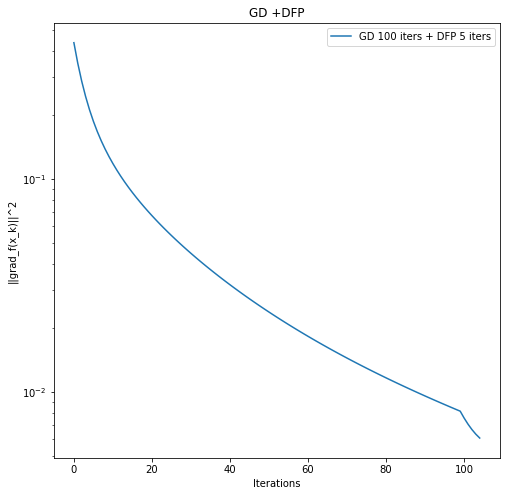

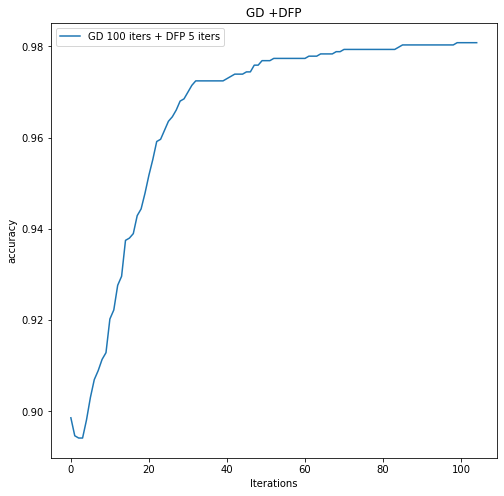

In [330]:
#DFP
title = 'DFP'
r(opt)
n_iter_gd = 100
n_iter_newton = 5
x_0 = np.zeros(args['d'])
iter_list, points_list, differences_list, times_list, acc_list, labels_list = [], [], [], [], [], []

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return 1/args['L']

gd = opt.NewtonOptimizer(
                        logloss, logloss_grad, gamma_k = gamma_gd, criterium = '||grad_f(x_k)||', 
                        x_0 = x_0, n_iter = n_iter_gd, args = args, acc_k = log_acc
                        )

points_arr_1, differences_arr_1, times_arr_1, acc_arr_1 = gd.descent() 

def gamma_dfp(k, f, grad_f, x_k, x_true, args):
        return 0.1

dfp = opt.NewtonOptimizer(
                            logloss, logloss_grad, gamma_k = gamma_dfp, criterium = '||grad_f(x_k)||', 
                            x_0 = points_arr_1[-1], n_iter = n_iter_newton, args = args, acc_k = log_acc,
                            dfp_activate = True, hessian_f = logloss_hess
                            )

points_arr_2, differences_arr_2, times_arr_2, acc_arr_2 = dfp.descent()

points_list.append(np.concatenate((points_arr_1, points_arr_2), axis=0))
iter_list.append([i for i in range(len(points_arr_1) + len(points_arr_2))])
differences_list.append(np.concatenate((differences_arr_1, differences_arr_2)))
times_list.append(np.concatenate((times_arr_1, times_arr_2)))
acc_list.append(np.concatenate((acc_arr_1, acc_arr_2)))
labels_list.append(r'GD %i iters + DFP %i iters' % (n_iter_gd, n_iter_newton))

opt.plot_graphs(iter_list, differences_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD +' + title, 
                logscale = True, criteria_type = "||grad_f(x_k)||^2")
opt.plot_graphs(iter_list, acc_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD +' + title, 
                logscale = False, criteria_type = "accuracy")

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


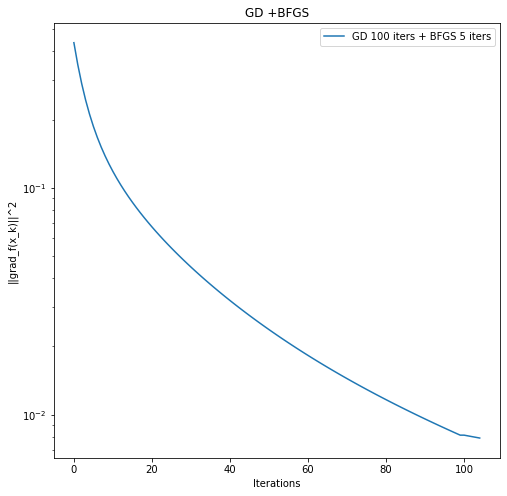

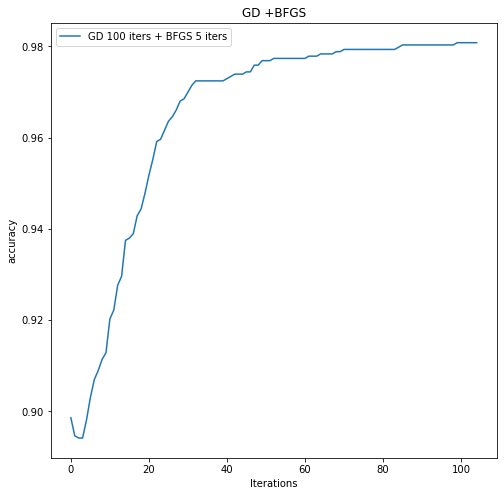

In [331]:
#BFGS
title = 'BFGS'
r(opt)
n_iter_gd = 100
n_iter_newton = 5
x_0 = np.zeros(args['d'])
iter_list, points_list, differences_list, times_list, acc_list, labels_list = [], [], [], [], [], []

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return 1/args['L']

gd = opt.NewtonOptimizer(
                        logloss, logloss_grad, gamma_k = gamma_gd, criterium = '||grad_f(x_k)||', 
                        x_0 = x_0, n_iter = n_iter_gd, args = args, acc_k = log_acc
                        )

points_arr_1, differences_arr_1, times_arr_1, acc_arr_1 = gd.descent() 

def gamma_bfgs(k, f, grad_f, x_k, x_true, args):
        return 0.001

bfgs = opt.NewtonOptimizer(
                            logloss, logloss_grad, gamma_k = gamma_bfgs, criterium = '||grad_f(x_k)||', 
                            x_0 = points_arr_1[-1], n_iter = n_iter_newton, args = args, acc_k = log_acc,
                            bfgs_activate = True, hessian_f = logloss_hess
                            )

points_arr_2, differences_arr_2, times_arr_2, acc_arr_2 = bfgs.descent()

points_list.append(np.concatenate((points_arr_1, points_arr_2), axis=0))
iter_list.append([i for i in range(len(points_arr_1) + len(points_arr_2))])
differences_list.append(np.concatenate((differences_arr_1, differences_arr_2)))
times_list.append(np.concatenate((times_arr_1, times_arr_2)))
acc_list.append(np.concatenate((acc_arr_1, acc_arr_2)))
labels_list.append(r'GD %i iters + BFGS %i iters' % (n_iter_gd, n_iter_newton))

opt.plot_graphs(iter_list, differences_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD +' + title, 
                logscale = True, criteria_type = "||grad_f(x_k)||^2")
opt.plot_graphs(iter_list, acc_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD +' + title, 
                logscale = False, criteria_type = "accuracy")

 10%|█         | 1/10 [00:03<00:27,  3.03s/it]

0.6049401942091335
0 2
1.600481152999345
1 3


 20%|██        | 2/10 [00:04<00:19,  2.47s/it]

1.50083441808019
2 4


 30%|███       | 3/10 [00:05<00:15,  2.23s/it]

1.6106079997422316
3 5


 40%|████      | 4/10 [00:06<00:11,  1.90s/it]

1.5134308534368888
4 6


 50%|█████     | 5/10 [00:08<00:09,  1.82s/it]

1.6236205937920347


 60%|██████    | 6/10 [00:10<00:07,  1.81s/it]

5 7
1.5253464419281981
6 8


 70%|███████   | 7/10 [00:12<00:05,  1.82s/it]

1.6359196339823268
7 9


 80%|████████  | 8/10 [00:13<00:03,  1.67s/it]

1.5366469238960223


 90%|█████████ | 9/10 [00:16<00:01,  1.90s/it]

8 10
1.6475723425661175
9 11


100%|██████████| 10/10 [00:17<00:00,  1.72s/it]


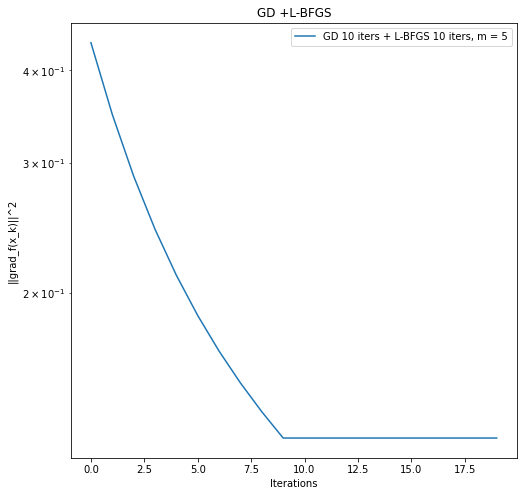

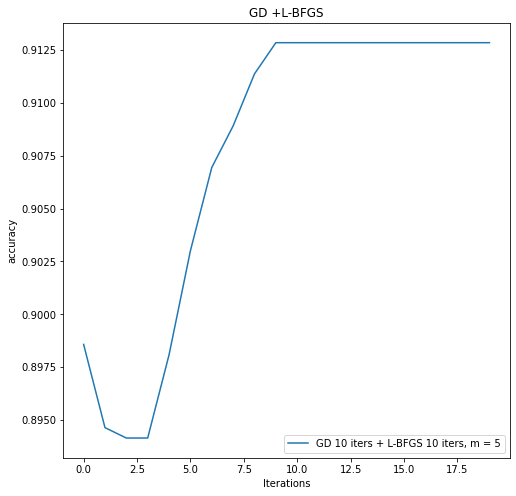

In [354]:
#L-BFGS
title = 'L-BFGS'
r(opt)
n_iter_gd = 10
n_iter_quasinewton = 10
x_0 = np.zeros(args['d'])
iter_list, points_list, differences_list, times_list, acc_list, labels_list = [], [], [], [], [], []

def gamma_gd(k, f, grad_f, x_k, x_true, args):
        return 1/args['L']

gd = opt.NewtonOptimizer(
                        logloss, logloss_grad, gamma_k = gamma_gd, criterium = '||grad_f(x_k)||', 
                        x_0 = x_0, n_iter = n_iter_gd, args = args, acc_k = log_acc
                        )

points_arr_1, differences_arr_1, times_arr_1, acc_arr_1 = gd.descent() 

def gamma_l_bfgs(k, f, grad_f, x_k, x_true, args):
        return 1

args['m'] = 5
l_bfgs = opt.NewtonOptimizer(
                        logloss, logloss_grad, gamma_k = gamma_l_bfgs, criterium = '||grad_f(x_k)||', 
                        x_0 = points_arr_1[-1], n_iter = n_iter_quasinewton, args = args, acc_k = log_acc,
                        l_bfgs_activate = True, hessian_f = logloss_hess, m_l_bfgs = args['m']
                        )

points_arr_2, differences_arr_2, times_arr_2, acc_arr_2 = l_bfgs.descent()

points_list.append(np.concatenate((points_arr_1, points_arr_2), axis=0))
iter_list.append([i for i in range(len(points_arr_1) + len(points_arr_2))])
differences_list.append(np.concatenate((differences_arr_1, differences_arr_2)))
times_list.append(np.concatenate((times_arr_1, times_arr_2)))
acc_list.append(np.concatenate((acc_arr_1, acc_arr_2)))
labels_list.append(r'GD %i iters + L-BFGS %i iters, m = %i' % (n_iter_gd, n_iter_quasinewton, args['m']))

opt.plot_graphs(iter_list, differences_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD +' + title, 
                logscale = True, criteria_type = "||grad_f(x_k)||^2")
opt.plot_graphs(iter_list, acc_list, x_label = "Iterations", lines_labels = labels_list, title = 'GD +' + title, 
                logscale = False, criteria_type = "accuracy")

### Conclusion

Now I think it is in the gradient calculation, but in other homeworks it worked well, and right now I am fixing it.

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [319]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [320]:
#ответ